In [11]:
import numpy as np
import scipy.io
import seaborn as sns

from matplotlib import animation
import matplotlib.pyplot as plt
import seaborn as sns # named from Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing.
import pandas as pd
import os

directory = '/Users/mkals/data/OximeterTestingData/Logs'

def severinghaus(x):
    if x == 0:
        return 0
    return ((((x**3+150*x)**-1 * 23400)+1)**-1) * 100

# data: full list to be processed
# splits: numeber of consecutive elements to be processed
# func: lambda function that takes the subset and returns what should be stored in return array
def map_reduce(data, splits, func):
    data = list(data)
    return [func(data[i:i + splits]) for i in range(len(data) - splits + 1)]

def plot_pressure(df, new=True):
    if new:
        plt.figure()

    title = 'pressure'
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.p)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Pressure (atm)')

def plot_processed(df, new=True):
    if new:
        plt.figure()

    title = 'processed'
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.red_sig)
    plt.plot(df.utc_time, df.ir_sig)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])

def plot_raw(df, new=True):
    if new:
        plt.figure()

    title = 'raw'
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.r)
    plt.plot(df.utc_time, df.i)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])



def plot_bath_summary(df):

    period = 2
    mesurement_interval = (
        df.utc_time.iloc[-1] - df.utc_time.iloc[0]) / df.shape[0]
    point_count = int(period / mesurement_interval)

    times = map_reduce(df['utc_time'], point_count, np.mean)
    dc_r = map_reduce(df.r, point_count, np.mean)
    dc_i = map_reduce(df.i, point_count, np.mean)
    ac_r = map_reduce(df.r, point_count, (lambda x: max(x) - min(x)))
    ac_i = map_reduce(df.i, point_count, (lambda x: max(x) - min(x)))

    dc_r_mean = np.mean(dc_r)
    dc_i_mean = np.mean(dc_i)
    ac_r_mean = np.mean(ac_r)
    ac_i_mean = np.mean(ac_i)

    print(f'DC Red = {dc_r_mean:.0f}')
    print(f'DC IR  = {dc_i_mean:.0f}')
    print(f'AC Red = {ac_r_mean:.0f}')
    print(f'AC IR  = {ac_i_mean:.0f}')

    f, (ax1, ax2) = plt.subplots(1, 2)  # , sharey=True)

    # DC PLOT
    ax1.plot(df.utc_time, df.r)
    ax1.plot(df.utc_time, df.i)
    ax1.plot(times, dc_r, '-')
    ax1.plot(times, dc_i, '-')
    ax1.axhline(dc_r_mean)
    ax1.axhline(dc_i_mean)

    ax1.set_title('DC Bath Data')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Signal')
    ax1.legend(['r', 'i', 'r ra', 'i ra', 'r mean', 'i mean'])

    # AC PLOT
    ax2.plot(times, ac_r)
    ax2.plot(times, ac_i)
    ax2.axhline(ac_r_mean)
    ax2.axhline(ac_i_mean)

    ax2.set_title('AC')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Signal')
    ax2.legend(['r', 'i', 'r mean', 'i mean'])

    plt.figure()
    plt.plot(df.utc_time, df.SPO2)
    plt.plot(df.utc_time, df.SPO2Avg)
    plt.xlabel('Time')
    plt.ylabel('SpO2 %')

    plt.show()

/Users/mkals/data/OximeterTestingData/Logs/pressure_20210707_1701.csv


IndexError: single positional indexer is out-of-bounds

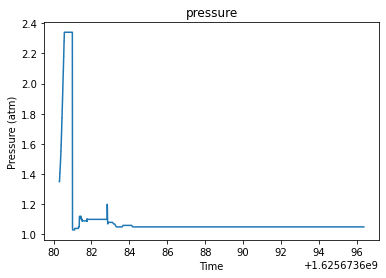

In [25]:
# Load files from disk and plot latest

fs = [f'{directory}/{f}' for f in os.listdir(director)]
csv_files = [f for f in fs if '.csv' in f]
csv_files.sort()
print(csv_files[-1])

b_dfs = [pd.read_csv(f) for f in csv_files if 'bath' in f]
p_dfs = [pd.read_csv(f) for f in csv_files if 'pressure' in f]
b_dfs[-1].drop(b_dfs[-1].iloc[:400,:].index.tolist(), inplace=True)

plot_pressure(p_dfs[-1])
plot_bath_summary(b_dfs[-1])

In [18]:
# data sets, bath oximeter, 3d printed white phantom P11 
severinghaus(100) # /Users/mkals/data/OximeterTestingData/Logs/pressure_20210707_1550.csv
severinghaus(38) # /Users/mkals/data/OximeterTestingData/Logs/pressure_20210707_1605.csv
severinghaus(83.2) # 

#print(b_dfs[-1].head())

96.17528547669203

In [1]:
def plot_processed(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.red_sig)
    plt.plot(df.utc_time, df.ir_sig)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])

def plot_raw(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.r)
    plt.plot(df.utc_time, df.i)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])


def plot_amplitude(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    print(df.utc_time[0])
    print(list(df.utc_time)[-1])
    
    period = 2
    mesurement_interval = (df.utc_time.iloc[-1] - df.utc_time.iloc[0]) / df.shape[0]
    point_count = int(period / mesurement_interval)

    times = map_reduce(df['utc_time'], point_count, np.mean)
    dc_r = map_reduce(df.r, point_count, np.mean)
    dc_i = map_reduce(df.i, point_count, np.mean)
    ac_r = map_reduce(df.r, point_count, (lambda x: max(x) - min(x)) )
    ac_i = map_reduce(df.i, point_count, (lambda x: max(x) - min(x)) )

    plt.plot(times, dc_r)
    plt.plot(times, dc_i)
    
    plt.figure()
    plt.title('AC')
    plt.plot(times, ac_r)
    plt.plot(times, ac_i)

def print_ac_dc(f, period = 2):

    title = f.split('/')[-1]
    df = pd.read_csv(f)

    mesurement_interval = (df.utc_time.iloc[-1] - df.utc_time.iloc[0]) / df.shape[0]
    point_count = int(period / mesurement_interval)

    dc_r = map_reduce(df.r, point_count, np.mean)
    dc_i = map_reduce(df.i, point_count, np.mean)
    ac_r = map_reduce(df.r, point_count, (lambda x: max(x) - min(x)))
    ac_i = map_reduce(df.i, point_count, (lambda x: max(x) - min(x)))

    dc_r_mean = np.mean(dc_r)
    dc_i_mean = np.mean(dc_i)
    ac_r_mean = np.mean(ac_r)
    ac_i_mean = np.mean(ac_i)

    print(title)
    print(f'{dc_r_mean=}')
    print(f'{dc_i_mean=}')
    print(f'{ac_r_mean=}')
    print(f'{ac_i_mean=}')

for f in csv_files[:3]:
    print_ac_dc(f)
    plt.figure()
    plot_raw(f)
    plot_amplitude(f)
    plt.figure()
    plot_processed(f)

NameError: name 'csv_files' is not defined

        t     r1     i1       r2       i2
name                                     
14A2  0.4   7297   7664   8299.0   8679.0
14B2  0.6   8769  10651  10726.0  11511.0
14C2  0.8   7615   7503   7245.0   8235.0
15A2  1.0   7101   6909   8167.0   8746.0
15B2  1.2  13203  13308  12633.0  14013.0


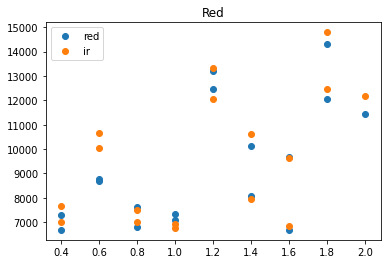

In [27]:
df = pd.read_csv('/Users/mkals/Developer/Cambridge/Oximeter Testing/Data/Logs/finger-transmission.csv', index_col=0)
def plot_r_i(df):
    plt.figure()
    plt.title('Red')
    plt.plot(df.t, df.r1, 'o')
    plt.plot(df.t, df.i1, 'o')
    plt.legend(['red', 'ir'])

dfA = df#.filter(regex=r'.+B.', axis=0)
print(dfA.head())
plot_r_i(dfA)
